<a href="https://colab.research.google.com/github/yovictoraugusto/CDM-T5-Bart-Summarization/blob/main/CDM_T5_Bart_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Importing and installing section

In [ ]:
!pip install --quiet transformers
!pip install --quiet torch torchvision torchtext
!pip install --quiet pytorch_lightning
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade torch torchtext
!pip install torch==2.0.0 torchtext==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
# To manipulate dataframes
import pandas as pd
import json

# To generate figures and charts
import matplotlib.pyplot as plt

# To generate our IA
import torch
import torchtext
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, BertForSequenceClassification, AutoModelForSeq2SeqLM, BartForConditionalGeneration, BartTokenizer
from transformers import T5Tokenizer, T5ForConditionalGeneration
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from bert_score import score

# To create dataset
from torch.utils.data import Dataset, DataLoader

# To create figures
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoModelForTokenClassification, AutoTokenizer

In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

In [ ]:
import gc



---


# Loading Review Dataset

In [ ]:
!gdown 1VTimD9iLImC0Vj8jDy8TIv3ekxmUo9no
# https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews/data

Downloading...
From (original): https://drive.google.com/uc?id=1VTimD9iLImC0Vj8jDy8TIv3ekxmUo9no
From (redirected): https://drive.google.com/uc?id=1VTimD9iLImC0Vj8jDy8TIv3ekxmUo9no&confirm=t&uuid=2243d2c5-fb10-4d42-90a5-fbe93a28e120
To: /content/amazon-books-reviews.zip
100% 1.14G/1.14G [00:27<00:00, 41.1MB/s]


In [ ]:
!unzip amazon-books-reviews.zip -d data

Archive:  amazon-books-reviews.zip
  inflating: data/Books_rating.csv   
  inflating: data/books_data.csv     


In [ ]:
!rm amazon-books-reviews.zip

In [ ]:
file_path = "/content/data/Books_rating.csv"
df_bookRating = pd.read_csv(file_path, encoding="latin-1")
df_bookRating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
df_bookRating.shape

(3000000, 10)



---


# Loading Book Information Dataset

In [ ]:
file_path = "/content/data/books_data.csv"
df_bookData = pd.read_csv(file_path, encoding="latin-1")
df_bookData.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
df_bookData.shape

(212404, 10)



---


# Cleaning useless data for this project

#### Cleaning df_bookRatings



In [ ]:
df_bookRating.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [ ]:
df_bookRating.drop_duplicates(inplace=True)

In [ ]:
bookRating = df_bookRating.drop(columns=['Id', 'User_id', 'profileName', 'review/time', 'Price'], axis=1)

In [ ]:
bookRating.isna().sum()

,0
Title,208
review/helpfulness,0
review/score,0
review/summary,407
review/text,8


In [ ]:
bookRating.dropna(inplace=True)
bookRating.isna().sum()

,0
Title,0
review/helpfulness,0
review/score,0
review/summary,0
review/text,0


In [ ]:
bookRating.head()

,Title,review/helpfulness,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


#### Cleaning df_bookData

In [ ]:
df_bookData.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [ ]:
df_bookData.drop_duplicates(inplace=True)

In [ ]:
bookData = df_bookData.drop(columns= ["description", "authors", "image" ,"previewLink", "publisher", "publishedDate", "infoLink", "ratingsCount"], axis= 1)

In [ ]:
bookData.isna().sum()

,0
Title,1
categories,41199


In [ ]:
bookData.dropna(inplace=True)
bookData.isna().sum()

,0
Title,0
categories,0


In [ ]:
bookData.head()

,Title,categories
0,Its Only Art If Its Well Hung!,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,['Religion']
3,Whispers of the Wicked Saints,['Fiction']
5,The Church of Christ: A Biblical Ecclesiology ...,['Religion']




---


#    Merging both dataframes

In [ ]:
df_base = pd.merge(bookRating, bookData, on="Title")
df_base.head()

,Title,review/helpfulness,review/score,review/summary,review/text,categories
0,Its Only Art If Its Well Hung!,7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,['Biography & Autobiography']
2,Dr. Seuss: American Icon,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",['Biography & Autobiography']
3,Dr. Seuss: American Icon,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",['Biography & Autobiography']
4,Dr. Seuss: American Icon,3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,['Biography & Autobiography']


In [ ]:
df_base.dropna(inplace=True)

In [ ]:
df_base.isna().sum()

,0
Title,0
review/helpfulness,0
review/score,0
review/summary,0
review/text,0
categories,0


In [ ]:
df_base.shape

(2441229, 6)

In [ ]:
del bookRating, bookData
gc.collect()

0



---


# Formatting data



*   Extracting textual data in the categories column
*   Extracing "&quot" from summary and text reviews
*   Word count in the 'review/text' column



In [ ]:
df_base["word_count_summary"] = df_base["review/summary"].str.split().str.len()

In [ ]:
df_base = df_base[df_base["word_count_summary"] >= 15]
df_base.shape

(11781, 7)

In [ ]:
df_base["word_count"] = df_base["review/text"].str.split().str.len()

In [ ]:
df_base = df_base[df_base["word_count"] <= 60]
df_base = df_base[df_base["word_count"] >= 30]

In [ ]:
df_base['categories'] = df_base['categories'].str.extract(r"\'(.*)\'")

In [ ]:
df_base['review/text'] = df_base['review/text'].apply(lambda x: x.replace("&quot;", '') if '&quot;' in x else x)

In [ ]:
df_base['review/summary'] = df_base['review/summary'].apply(lambda x: x.replace("&quot;", '') if '&quot;' in x else x)

In [ ]:
df_base.head()

,Title,review/helpfulness,review/score,review/summary,review/text,categories,word_count_summary,word_count
173,Voices from the Farm: Adventures in Community ...,2/2,5.0,If you are looking into starting or joining a ...,This book contains true accounts from former r...,Biography & Autobiography,15,48
2269,Tomorrow Will Be Better: A True Story of Love ...,1/1,5.0,Tomorrow Will Be Better: A True Story of Love ...,Excellent and well-written book. Recommended r...,Czechoslovakia,20,50
6763,Scary Stories to Tell in the Dark,0/1,5.0,My students love it! When someone is returning...,My students love to get this book. I bought 4 ...,"Ghost stories, American",23,58
7276,Foundation,0/5,5.0,It's NOT the FIRST book. Prelude to the Founda...,The first book in the series is NOT Foundation...,Education,15,48
8234,Foundation,0/5,5.0,It's NOT the FIRST book. Prelude to the Founda...,The first book in the series is NOT Foundation...,Education,15,48


In [ ]:
df_base.shape

(1381, 8)



---


# Datamining

### Top 10 book categories most reviewed

In [ ]:
df_base["categories"].value_counts().head(10)

,count
categories,
Fiction,322
Juvenile Fiction,100
History,72
Religion,65
Biography & Autobiography,53
Business & Economics,49
Self-Help,34
Capitalism,24
Health & Fitness,24


In [ ]:
categories = ['Fiction', 'Religion', 'Juvenile Fiction','Biography & Autobiography', 'History', 'Business & Economics', 'Computers', 'Family & Relationship', 'Cooking', 'Health & Fitness']


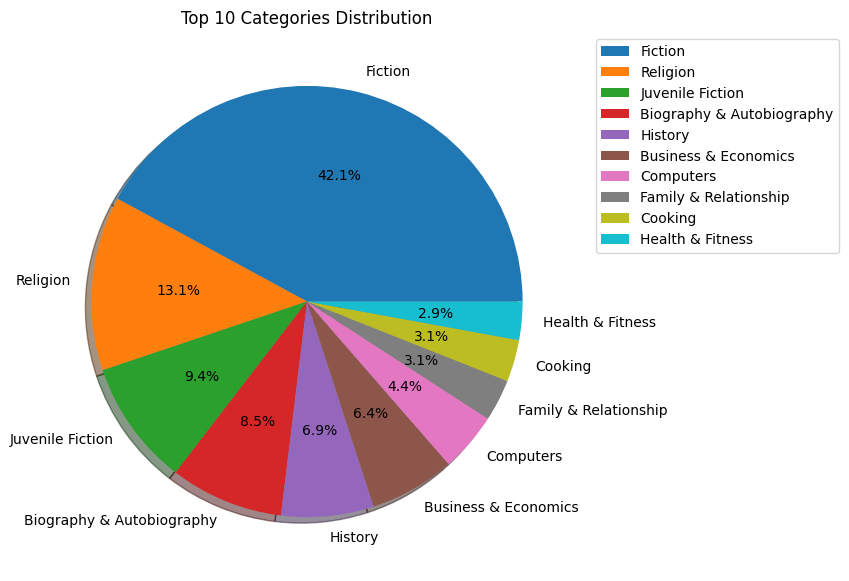

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_base["categories"].value_counts().head(10), labels=categories, autopct='%1.1f%%', shadow='true')
plt.title('Top 10 Categories Distribution')
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Top 10 books most reviewed

In [ ]:
df_base.Title.value_counts().head(10)

,count
Title,
An inquiry into the nature and causes of the wealth of nations,16
Great Expectations,16
The Hobbit,15
Pride and Prejudice,10
The Picture of Dorian Gray (Classic Collection (Brilliance Audio)),8
Mere Christianity,6
"An inquiry into the nature and causes of the wealth of nations,",6
1491: New Revelations of the Americas Before Columbus,6
Little Lord Fauntleroy,5


In [ ]:
titles = ['Eldest (Inheritance, Book 2)', 'Great Expectations', 'Hannibal', 'Jane Eyre (New Windmill)',
          'Jane Eyre (Large Print)', 'The Picture of Dorian Gray (Classic Collection (Brilliance Audio))', 'Good to Great',
          'The Five Love Languages: The Secret to Love that Lasts', 'A Tale of Two Cities - Literary Touchstone Edition',
          'Love & Respect: The Love She Most Desires; The Respect He Desperately Needs']

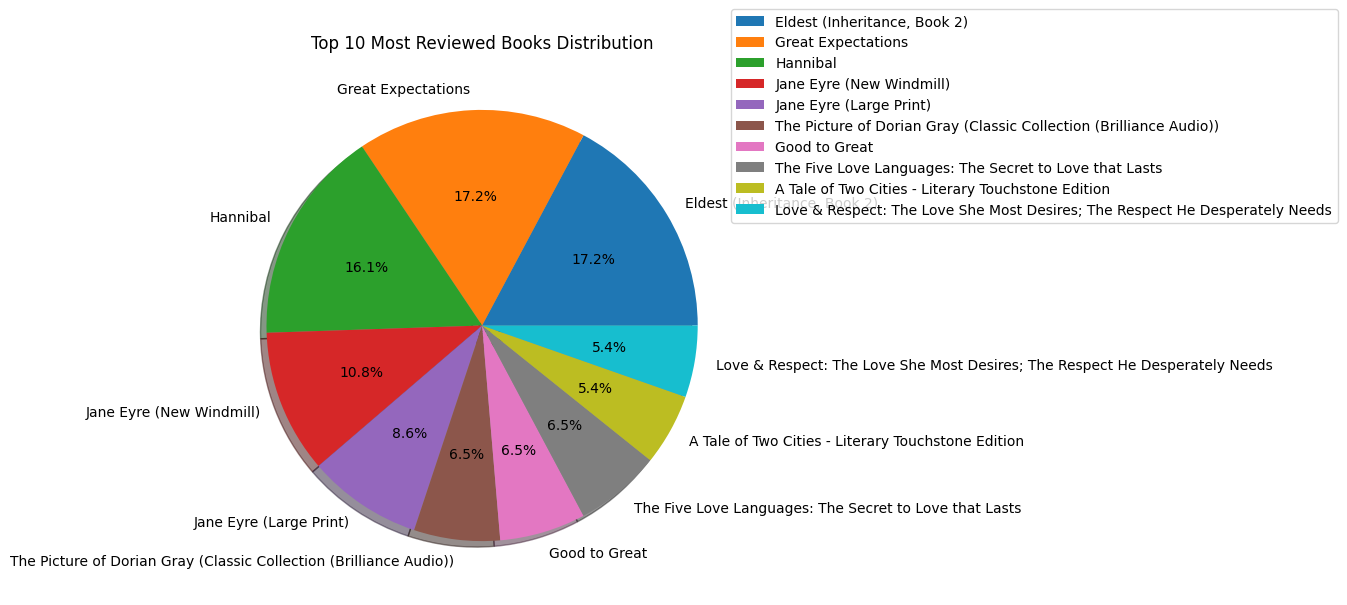

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_base.Title.value_counts().head(10), labels=titles, autopct='%1.1f%%', shadow='true')
plt.title('Top 10 Most Reviewed Books Distribution')
plt.axis('off')
plt.legend(bbox_to_anchor=(1.1, 0, 1, 1.1))
plt.show()

### Review Lenght

In [ ]:
df_base["word_count"].describe()

,word_count
count,1381.000000
mean,42.776973
std,8.804944
min,30.000000
25%,36.000000
50%,41.000000
75%,50.000000
max,60.000000


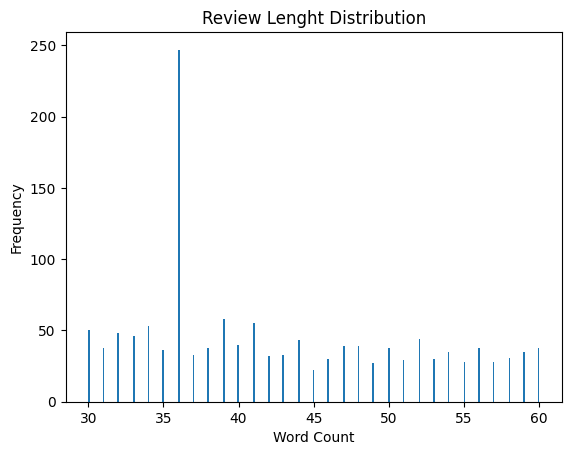

In [ ]:
plt.hist(df_base["word_count"], bins=281)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Review Lenght Distribution")
plt.show()

### Wordcloud Most Common Words

In [ ]:
sWords= set(STOPWORDS)

In [ ]:
df_base_1star = df_base[df_base["review/score"] == 1]

In [ ]:
df_base_5star = df_base[df_base["review/score"] == 5]

#### Wordcloud Review Text

In [ ]:
wc = WordCloud(width= 400, height= 400, min_font_size= 15, background_color= "white", stopwords= sWords)
spam_wc = wc.generate(df_base["review/text"].str.cat(sep= " "))

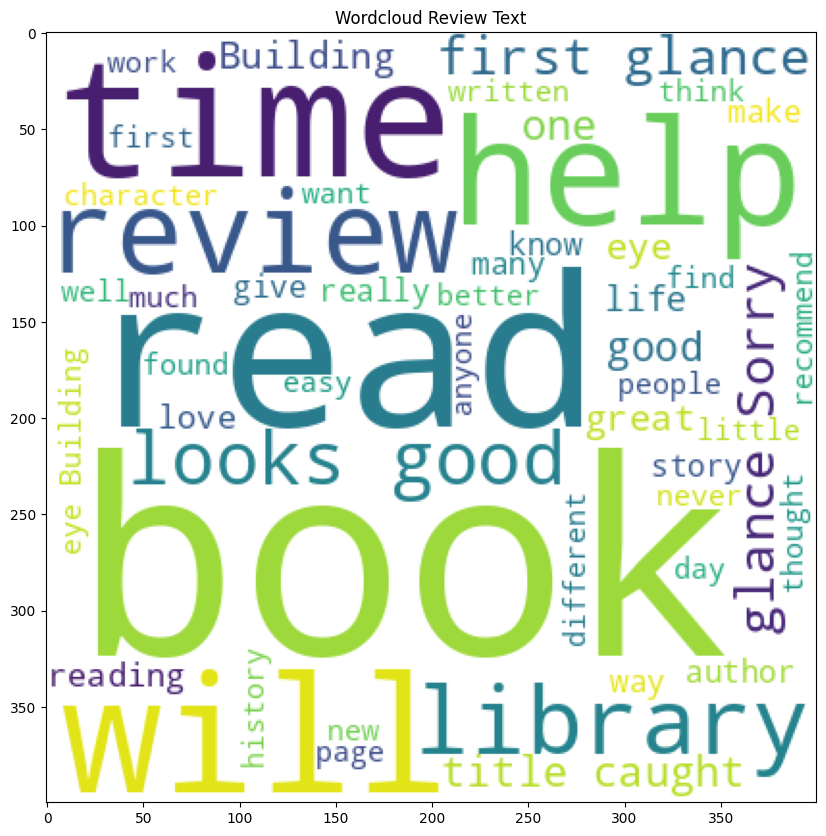

In [ ]:
plt.figure(figsize= (10, 10))
plt.imshow(spam_wc)
plt.title("Wordcloud Review Text")
plt.show()

#### Wordcloud Review Text 5-Star and 1-Star




In [ ]:
wc = WordCloud(width= 400, height= 400, min_font_size= 15, background_color= "white", stopwords= sWords)
spam_wc5star = wc.generate(df_base_5star["review/text"].str.cat(sep= " "))

In [ ]:
wc = WordCloud(width= 400, height= 400, min_font_size= 15, background_color= "white", stopwords= sWords)
spam_wc1star = wc.generate(df_base_1star["review/text"].str.cat(sep= " "))

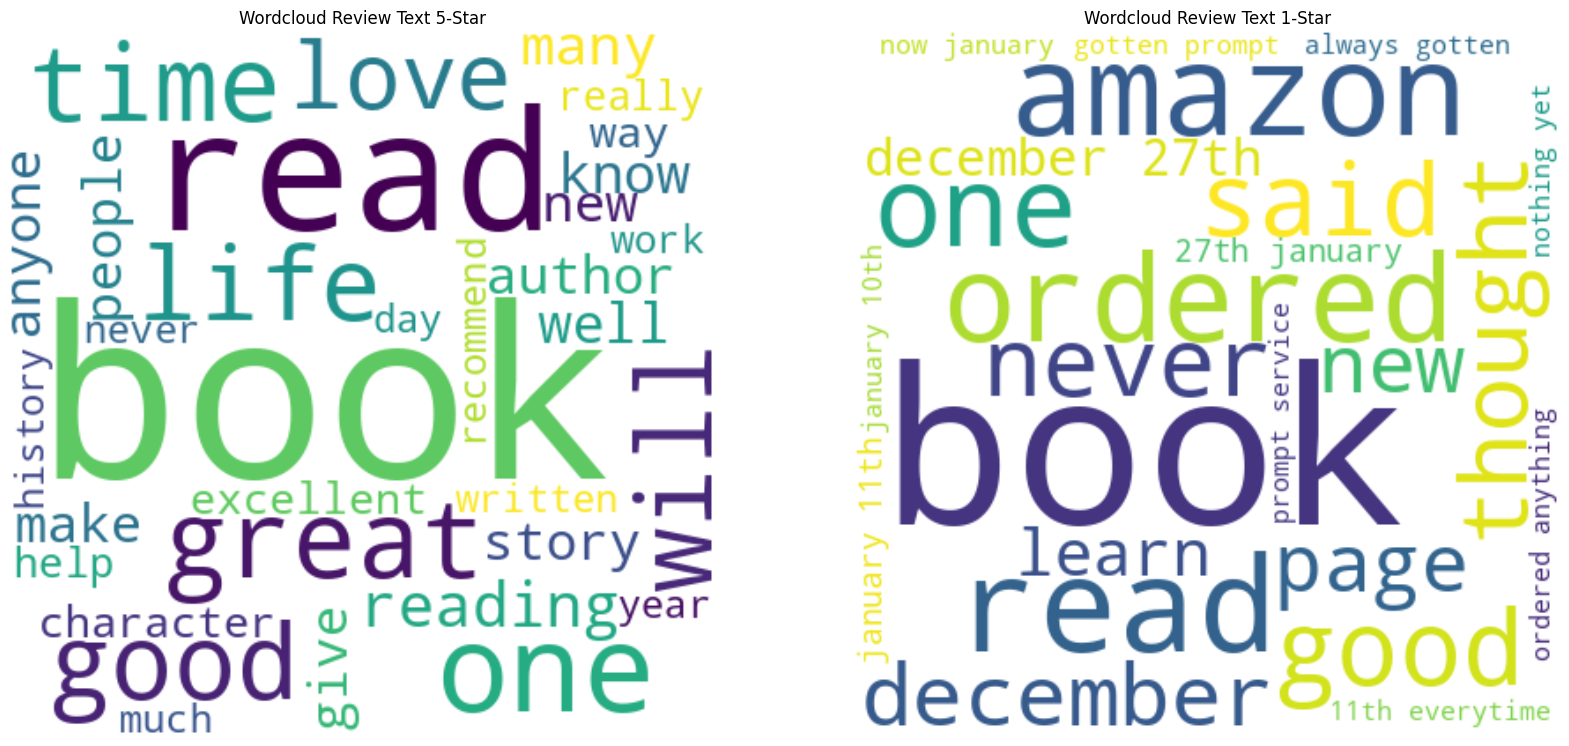

In [ ]:
fig, axes = plt.subplots(1, 2, figsize= (20, 10))

axes[0].imshow(spam_wc5star, interpolation = "bilinear")
axes[0].set_title("Wordcloud Review Text 5-Star")
axes[0].axis("off")

axes[1].imshow(spam_wc1star, interpolation = "bilinear")
axes[1].set_title("Wordcloud Review Text 1-Star")
axes[1].axis("off")

plt.show()

#### Wordcloud Review Summary

In [ ]:
wc = WordCloud(width= 400, height= 400, min_font_size= 15, background_color= "white", stopwords= sWords)
spam_wc = wc.generate(df_base["review/summary"].str.cat(sep= " "))

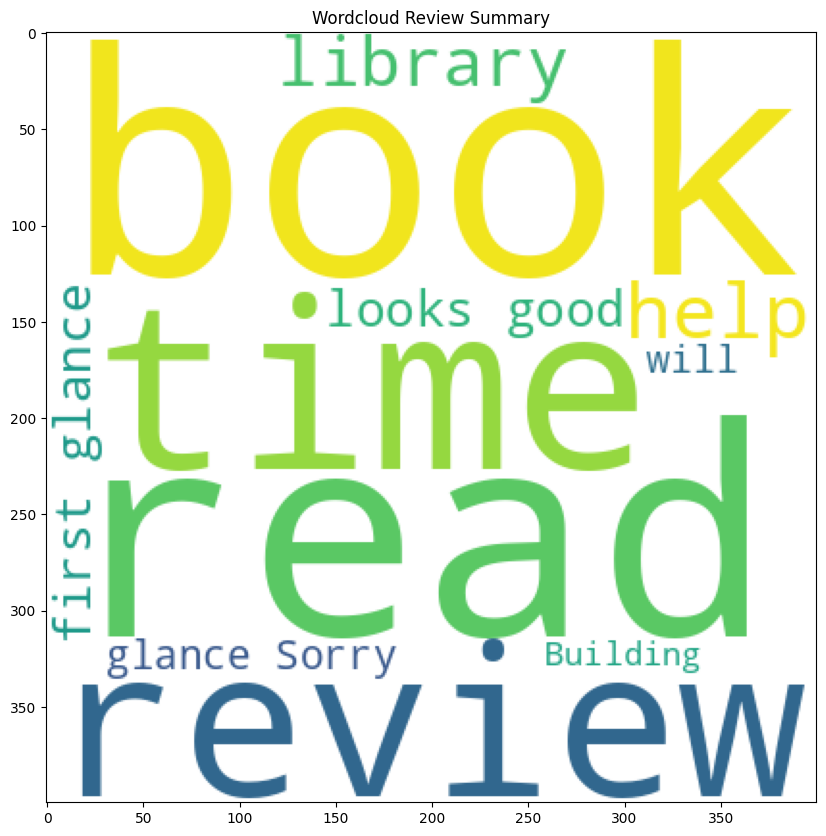

In [ ]:
plt.figure(figsize= (10, 10))
plt.imshow(spam_wc)
plt.title("Wordcloud Review Summary")
plt.show()

#### Wordcloud Review Summary 5-Star

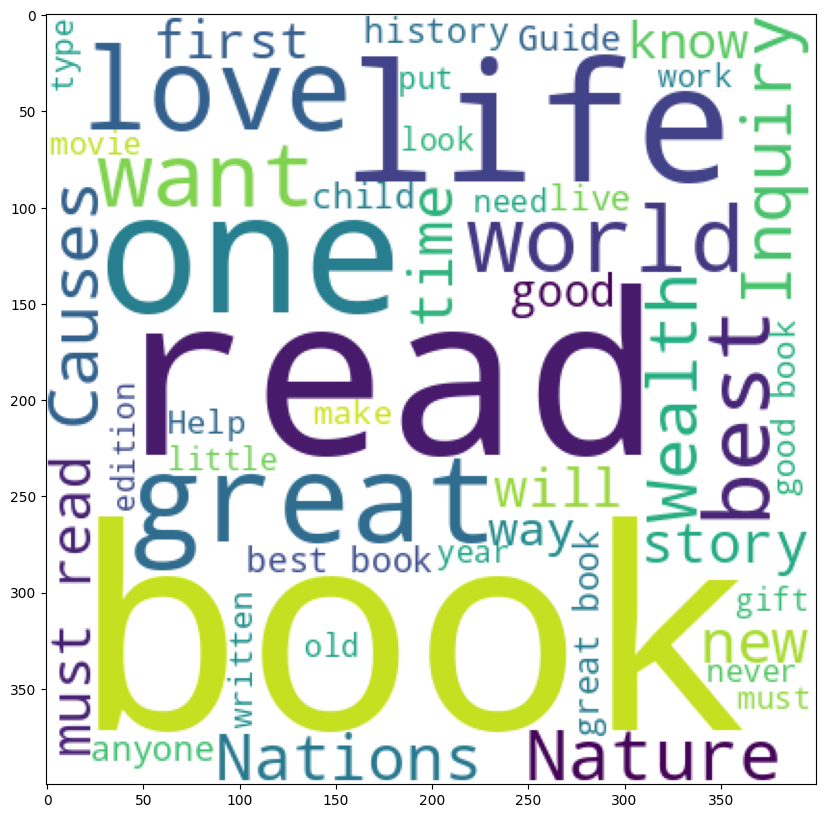

In [ ]:
wc = WordCloud(width= 400, height= 400, min_font_size= 15, background_color= "white", stopwords= sWords)
spam_wc = wc.generate(df_base_5star["review/summary"].str.cat(sep= " "))

plt.figure(figsize= (10, 10))
plt.imshow(spam_wc)
plt.show()

#### Wordcloud Review Summary 1-Star

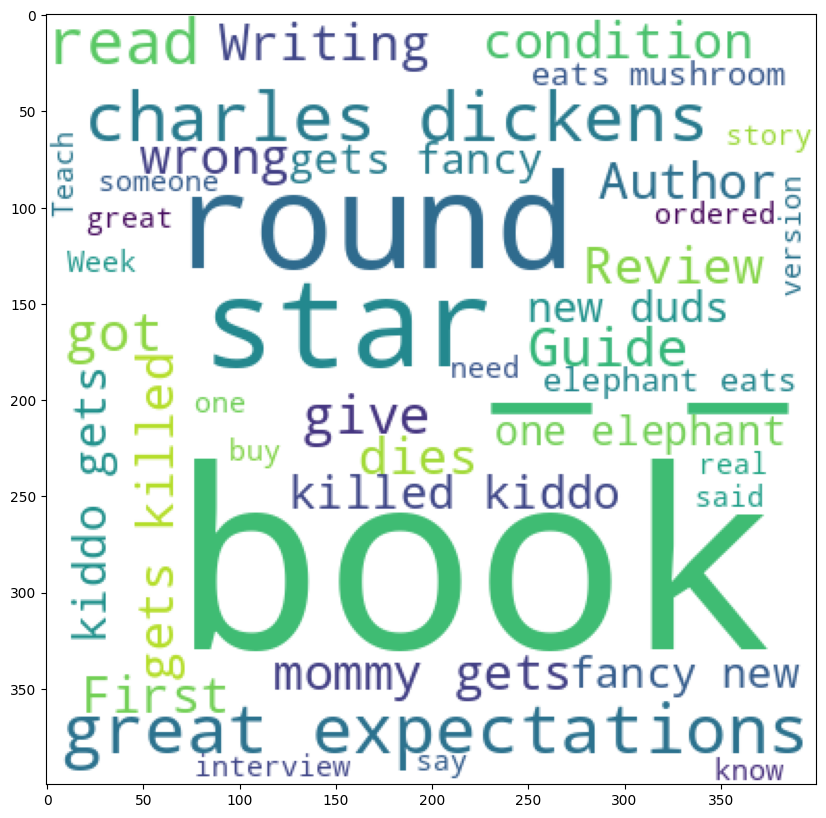

In [ ]:
wc = WordCloud(width= 400, height= 400, min_font_size= 15, background_color= "white", stopwords= sWords)
spam_wc = wc.generate(df_base_1star["review/summary"].str.cat(sep= " "))

plt.figure(figsize= (10, 10))
plt.imshow(spam_wc)
plt.show()

### Review Score Distribution

In [ ]:
df_base.shape[0]

1381

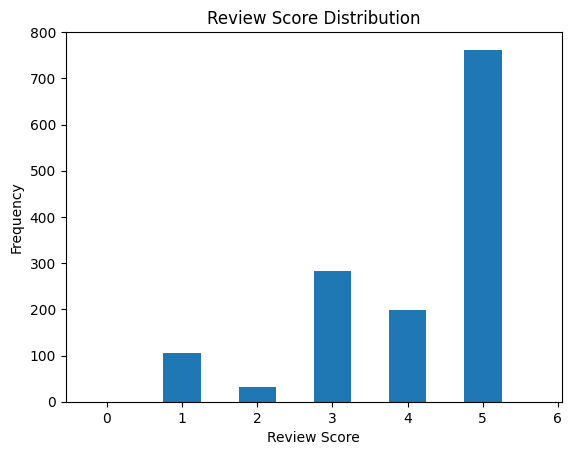

In [ ]:
plt.hist(df_base['review/score'],align='left', bins= 12, range= (0, 6))
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.title("Review Score Distribution")
plt.show()

---
# Function used in all experiments

In [ ]:
def summary_analysis(text, summary):
  P, R, F1 = score(text, summary, lang="en", verbose=True)
  return F1.tolist()



---



# Experiment 1

### T5 and BART without Fine-Tuning

- Testing GPU

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU: Tesla T4


- Loading pre-trained models and tokenizers

In [ ]:
MODEL_T5 = "google/flan-t5-small"
tokenizerT5 = T5Tokenizer.from_pretrained(MODEL_T5)
modelT5 = T5ForConditionalGeneration.from_pretrained(MODEL_T5)

MODEL_BART = "facebook/bart-base"
tokenizerBART = BartTokenizer.from_pretrained(MODEL_BART)
modelBART = BartForConditionalGeneration.from_pretrained(MODEL_BART)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

- Moving models to GPU

In [ ]:
modelT5.to(device)
modelBART.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNor

- Summarization with T5 without fine-tuning

In [ ]:
def summarize_without_finetuning_T5(text, tokenizer, model, device):
  inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(device)
  summary_ids = model.generate(inputs.input_ids, attention_mask=inputs.attention_mask, max_length=128)
  summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  return summary

- Summarization with BART without fine-tuning

In [ ]:
def summarize_without_finetuning_BART(text, tokenizer, model, device):
  inputs = tokenizer(text, max_length=1024, return_tensors="pt", truncation=True).to(device)
  summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
  summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  return summary

- T5 cross-validation
- BART cross-validation
- Performance analysis with BERTScore
- K-fold histogram plotting

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
model_printT5 = "T5 without Fine-Tuning"
model_printBART = "BART without Fine-Tuning"

results_T5_experiment1 = []
results_BART_experiment1 = []

for train_index, val_index in kf.split(df_base):
  train_data = df_base.iloc[train_index]
  val_data = df_base.iloc[val_index]

  summaryReviewT5 = []
  summaryReviewBART = []
  listSummary = []

  for index, row in val_data.iterrows():
    text = row["review/text"]

    summaryT5 = summarize_without_finetuning_T5(text, tokenizerT5, modelT5, device)
    summaryReviewT5.append(summaryT5)

    summaryBART = summarize_without_finetuning_BART(text, tokenizerBART, modelBART, device)
    summaryReviewBART.append(summaryBART)

    listSummary.append(row["review/summary"])

  analysis_resultT5 = summary_analysis(summaryReviewT5, listSummary)
  results_T5_experiment1.append(analysis_resultT5)

  analysis_resultBART = summary_analysis(summaryReviewBART, listSummary)
  results_BART_experiment1.append(analysis_resultBART)

  print(analysis_resultT5)
  print(analysis_resultBART)

  #Plot T5
  plt.figure(figsize=(10, 6))
  plt.hist(analysis_resultT5, bins=10, color='blue', alpha=0.7)
  plt.title(f"Distribution of F1 Scores for {model_printT5} - Fold {fold_number}")
  plt.xlabel("F1 Score")
  plt.ylabel("Frequency")
  plt.grid(True)
  plt.show()

  #Plot BART
  plt.figure(figsize=(10, 6))
  plt.hist(analysis_resultBART, bins=10, color='blue', alpha=0.7)
  plt.title(f"Distribution of F1 Scores for {model_printBART} - Fold {fold_number}")
  plt.xlabel("F1 Score")
  plt.ylabel("Frequency")
  plt.grid(True)
  plt.show()

  fold_number += 1

In [ ]:
print(results_T5_experiment1)

- Average k-fold results for T5

In [ ]:
import matplotlib.pyplot as plt

averageT51 = round(sum(results_T5_experiment1[0]) / len(results_T5_experiment1[0]), 3)
averageT52 = round(sum(results_T5_experiment1[1]) / len(results_T5_experiment1[1]), 3)
averageT53 = round(sum(results_T5_experiment1[2]) / len(results_T5_experiment1[2]), 3)
averageT54 = round(sum(results_T5_experiment1[3]) / len(results_T5_experiment1[3]), 3)
averageT55 = round(sum(results_T5_experiment1[4]) / len(results_T5_experiment1[4]), 3)

print("Average Fold-1:", averageT51)
print("Average Fold-2:", averageT52)
print("Average Fold-3:", averageT53)
print("Average Fold-4:", averageT54)
print("Average Fold-5:", averageT55)

overall_average_T5 = round((averageT51 + averageT52 + averageT53 + averageT54 + averageT55) / 5, 3)
print("Average:", overall_average_T5)

averages = [averageT51, averageT52, averageT53, averageT54, averageT55]
folds = ['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4', 'Fold-5']

# graphic
plt.bar(folds, averages, color='blue')
plt.title('Average Values per Fold in T5')
plt.xlabel('Folds')
plt.ylabel('Average Value')
plt.ylim(min(averages) * 0.98, max(averages) * 1.02)
plt.axhline(y=overall_average_T5, color='red', linestyle='--', linewidth=2, label=f'Overall Average: {overall_average_T5}')

# Add text labels on top of the bars
for i in range(len(averages)):
    plt.text(i, averages[i] + (max(averages) * 0.0001), str(averages[i]), ha='center', va='bottom')

plt.legend()
plt.show()

In [ ]:
print(results_BART_experiment1)

- Average k-fold results for T5

In [ ]:
averageBART1 = round(sum(results_BART_experiment1[0]) / len(results_BART_experiment1[0]), 3)
averageBART2 = round(sum(results_BART_experiment1[1]) / len(results_BART_experiment1[1]), 3)
averageBART3 = round(sum(results_BART_experiment1[2]) / len(results_BART_experiment1[2]), 3)
averageBART4 = round(sum(results_BART_experiment1[3]) / len(results_BART_experiment1[3]), 3)
averageBART5 = round(sum(results_BART_experiment1[4]) / len(results_BART_experiment1[4]), 3)

print("Average Fold-1:", averageBART1)
print("Average Fold-2:", averageBART2)
print("Average Fold-3:", averageBART3)
print("Average Fold-4:", averageBART4)
print("Average Fold-5:", averageBART5)

overall_average_BART = round((averageBART1 + averageBART2 + averageBART3 + averageBART4 + averageBART5) / 5, 3)
print("Average:", overall_average_BART)

averages_BART = [averageBART1, averageBART2, averageBART3, averageBART4, averageBART5]
folds = ['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4', 'Fold-5']

# graphic
overall_average_BART = round((averageBART1 + averageBART2 + averageBART3 + averageBART4 + averageBART5) / 5, 3)

plt.bar(folds, averages_BART, color='blue')

plt.title('Average BART Values per Fold')
plt.xlabel('Folds')
plt.ylabel('Average Value')

plt.ylim(min(averages_BART) * 0.98, max(averages_BART) * 1.02)

plt.axhline(y=overall_average_BART, color='red', linestyle='--', linewidth=2, label=f'Overall Average: {overall_average_BART}')

for i in range(len(averages_BART)):
    plt.text(i, averages_BART[i] + (max(averages_BART) * 0.0001), str(averages_BART[i]), ha='center', va='bottom')

plt.legend()
plt.show()

-----

# Experiment 2

### T5 with fine-tuning and Bart without fine-tuning

- Testing GPU

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")


### Preprocesses the dataset

Preparing data for NLP training:
* Database tokenization;
* Defining the maximum size of tokens;
* Creating the attention mask, responsible for indicating what is a token and what is padding;
* Data normalization.

In [ ]:
N_EPOCHS = 3
BATCH_SIZE = 8
numWorkers= 2
k_folds = 5

In [ ]:
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold_results = []

*  Loading the pre-trained tokenizer

In [ ]:
MODEL_T5 = "google/flan-t5-small"
tokenizerT5 = AutoTokenizer.from_pretrained(MODEL_T5, do_lower_case= True)

MODEL_BART = "facebook/bart-base"
tokenizerBART = BartTokenizer.from_pretrained(MODEL_BART)
modelBART = BartForConditionalGeneration.from_pretrained(MODEL_BART)

In [ ]:
modelBART.to(device)

In [ ]:
class ReviewSummaryDataset(Dataset):

  def __init__(
      self,
      data: pd.DataFrame,
      tokenizer: AutoTokenizer,
      text_max_token_len: int = 512,
      summary_max_token_len: int = 128
  ):

    self.tokenizer = tokenizer
    self.data = data
    self.text_max_token_len = text_max_token_len
    self.summary_max_token_len = summary_max_token_len

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index: int):
    data_row = self.data.iloc[index]

    text = "Generate a summary book review: " + data_row["review/text"]

    review_encoding = self.tokenizer(
        text,
        max_length=self.text_max_token_len,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"
    )

    summary_encoding = self.tokenizer(
        data_row["review/summary"],
        max_length=self.summary_max_token_len,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"
    )

    labels = summary_encoding["input_ids"]
    labels[labels == 0] = -100

    return dict(
        text = text,
        summary= data_row["review/summary"],
        text_input_ids = review_encoding["input_ids"].flatten(),
        text_attention_mask = review_encoding["attention_mask"].flatten(),
        labels = labels.flatten(),
        labels_attention_mask = summary_encoding["attention_mask"].flatten()
    )

*  PyTorch Lightning module definition for organizing and managing datasets


In [ ]:
class ReviewSummaryDataModule(pl.LightningDataModule):

  def __init__(
      self,
      train_df: pd.DataFrame,
      test_df: pd.DataFrame,
      tokenizer: AutoTokenizer,
      batch_size: int = 8,
      text_max_token_len: int = 512,
      summary_max_token_len: int = 128,
      num_workers: int = 2
  ):

    super().__init__()
    self.train_df = train_df
    self.test_df = test_df

    self.batch_size = batch_size
    self.tokenizer = tokenizer
    self.text_max_token_len = text_max_token_len
    self.summary_max_token_len = summary_max_token_len

  def setup(self, stage= None):
    self.train_dataset = ReviewSummaryDataset(
        self.train_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )

    self.test_dataset = ReviewSummaryDataset(
        self.test_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )

  def train_dataloader(self):
    return DataLoader(
        self.train_dataset,
        batch_size= self.batch_size,
        shuffle= True,
        num_workers= 2
    )

  def val_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size= self.batch_size,
        shuffle= False,
        num_workers= 2
    )

  def test_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size= self.batch_size,
        shuffle= False,
        num_workers= 2
    )

*   Creating a class instance

In [ ]:
class ReviewSummaryModel(pl.LightningModule):

  def __init__(self, model_name, n_classes, tokenizer, steps_per_epoch=None, n_epochs=None, lr=2e-5):
    super().__init__()
    self.model= AutoModelForSeq2SeqLM.from_pretrained(model_name)
    self.lr = lr
    self.generated_summaries = []
    self.tokenizer = tokenizer

  def forward(self, input_ids, attention_mask, labels= None):
    output = self.model(
        input_ids,
        attention_mask= attention_mask,
        labels= labels,
    )

    return output.loss, output.logits

  def training_step(self, batch, batch_idx):
    input_ids = batch["text_input_ids"]
    attention_mask = batch["text_attention_mask"]
    labels = batch["labels"]

    loss, outputs = self(input_ids=input_ids,
         attention_mask=attention_mask,
         labels=labels)

    self.log("train_loss", loss, prog_bar=True, logger=True)
    return loss

  def validation_step(self, batch, batch_idx):
    input_ids = batch["text_input_ids"]
    attention_mask = batch["text_attention_mask"]
    labels = batch["labels"]

    loss, outputs = self(input_ids=input_ids,
                          attention_mask=attention_mask,
                          labels=labels)

    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss

  def test_step(self, batch, batch_idx):
    input_ids = batch["text_input_ids"]
    attention_mask = batch["text_attention_mask"]
    labels = batch["labels"]

    loss, outputs = self(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

    generated_ids = self.model.generate(
      input_ids=input_ids,
      attention_mask=attention_mask,
      max_length=150,
      num_beams=2,
      repetition_penalty=2.5,
      length_penalty=1.0,
      early_stopping=True
    )

    preds = [
      self.tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
      for gen_id in generated_ids
    ]

    self.generated_summaries.extend(preds)

    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss

  def configure_optimizers(self):
    return AdamW(modelT5.parameters(), lr=2e-5)

### Training

In [ ]:
def summarize_without_finetuning_BART(text, tokenizer, model, device):
  inputs = tokenizer(text, max_length=1024, return_tensors="pt", truncation=True).to(device)
  summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
  summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  return summary

In [ ]:
modelT5 = ReviewSummaryModel(model_name=MODEL_T5, n_classes=2, tokenizer=tokenizerT5,lr=2e-5)

- Implementing k-folds

In [ ]:
fold_number = 1
model_printT5 = "T5 wiht Fine-Tuning"

results_T5_experiment2 = []
original_summaries = []

for fold, (train_idx, val_idx) in enumerate(kf.split(df_base)):
  train_data = df_base.iloc[train_idx]
  val_data = df_base.iloc[val_idx]

  data_module = ReviewSummaryDataModule(
    train_df=train_data,
    test_df=val_data,
    tokenizer=tokenizerT5,
    batch_size=BATCH_SIZE,
    text_max_token_len=512,
    summary_max_token_len=128,
    num_workers=numWorkers
  )

  checkpoint_callback = ModelCheckpoint(
    dirpath=f"checkpoints/fold_{fold + 1}",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val_loss",
    mode="min"
  )

  logger = TensorBoardLogger("lightning_logs", name=f"reviews-summary-fold-{fold + 1}")

  trainer = pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback],
    max_epochs=N_EPOCHS,
    devices=1,
    accelerator="gpu",
    enable_progress_bar=True
  )

  trainer.fit(modelT5, data_module)

  summaryReviewT5 = []
  listSummary = []

  modelT5.generated_summaries = []
  trainer.test(modelT5, data_module)
  summaryReviewT5 = modelT5.generated_summaries   # resumos gerados com o T5
  print("\n\n\nLISTA", summaryReviewT5, "\n\n\n")

  for idx, generated_summary in enumerate(summaryReviewT5):
    original_summary = val_data.iloc[idx]["review/summary"]
    listSummary.append(original_summary)

  analysis_resultT5 = summary_analysis(summaryReviewT5, listSummary)
  results_T5_experiment2.append(analysis_resultT5)

  #Plot T5
  plt.figure(figsize=(10, 6))
  plt.hist(analysis_resultT5, bins=10, color='blue', alpha=0.7)
  plt.title(f"Distribution of F1 Scores for {model_printT5} - Fold {fold_number}")
  plt.xlabel("F1 Score")
  plt.ylabel("Frequency")
  plt.grid(True)
  plt.show()

  fold_number += 1

- Average k-fold results for T5

In [ ]:
averageT51 = round(sum(results_T5_experiment2[0]) / len(results_T5_experiment2[0]), 3)
averageT52 = round(sum(results_T5_experiment2[1]) / len(results_T5_experiment2[1]), 3)
averageT53 = round(sum(results_T5_experiment2[2]) / len(results_T5_experiment2[2]), 3)
averageT54 = round(sum(results_T5_experiment2[3]) / len(results_T5_experiment2[3]), 3)
averageT55 = round(sum(results_T5_experiment2[4]) / len(results_T5_experiment2[4]), 3)

print("Average Fold-1:", averageT51)
print("Average Fold-2:", averageT52)
print("Average Fold-3:", averageT53)
print("Average Fold-4:", averageT54)
print("Average Fold-5:", averageT55)

overall_average_T5 = round((averageT51 + averageT52 + averageT53 + averageT54 + averageT55) / 5, 3)
print("Average:", overall_average_T5)

averages = [averageT51, averageT52, averageT53, averageT54, averageT55]
folds = ['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4', 'Fold-5']

# graphic
plt.bar(folds, averages, color='blue')
plt.title('Average Values per Fold in T5')
plt.xlabel('Folds')
plt.ylabel('Average Value')
plt.ylim(min(averages) * 0.98, max(averages) * 1.02)
plt.axhline(y=overall_average_T5, color='red', linestyle='--', linewidth=2, label=f'Overall Average: {overall_average_T5}')

for i in range(len(averages)):
    plt.text(i, averages[i] + (max(averages) * 0.0001), str(averages[i]), ha='center', va='bottom')

plt.legend()
plt.show()

----

# Experiment 3

## BART with fine-tuning


- Testing GPU

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

### Preprocess the dataset

Preparing data for NLP training:
* Database tokenization;
* Defining the maximum size of tokens;
* Creating the attention mask, responsible for indicating what is a token and what is padding;
* Data normalization.

In [ ]:
N_EPOCHS = 3
BATCH_SIZE = 8
numWorkers= 2
k_folds = 5

In [ ]:
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold_results = []

- Loading pre-trained model and tokenizer

In [ ]:
MODEL_T5 = "google/flan-t5-small"
tokenizerT5 = AutoTokenizer.from_pretrained(MODEL_T5, do_lower_case= True)

MODEL_BART = "facebook/bart-base"
tokenizerBART = BartTokenizer.from_pretrained(MODEL_BART)
modelBART = BartForConditionalGeneration.from_pretrained(MODEL_BART)

In [ ]:
class ReviewSummaryDataset_BART(Dataset):

    def __init__(
        self,
        data: pd.DataFrame,
        tokenizer: AutoTokenizer,
        text_max_token_len: int = 512,
        summary_max_token_len: int = 128
    ):
        self.tokenizer = tokenizer
        self.data = data
        self.text_max_token_len = text_max_token_len
        self.summary_max_token_len = summary_max_token_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):
        data_row = self.data.iloc[index]

        text = data_row["review/text"]
        summary = data_row["review/summary"]

        text_encoding = self.tokenizer(
            text,
            max_length=self.text_max_token_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors="pt"
        )

        summary_encoding = self.tokenizer(
            summary,
            max_length=self.summary_max_token_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors="pt"
        )

        labels = summary_encoding["input_ids"].squeeze()
        labels[labels == 0] = -100

        return {
            "input_ids": text_encoding["input_ids"].squeeze(),
            "attention_mask": text_encoding["attention_mask"].squeeze(),
            "labels": labels,
            "decoder_attention_mask": summary_encoding["attention_mask"].squeeze()
        }


*  PyTorch Lightning module definition for organizing and managing datasets


In [ ]:
class ReviewSummaryDataModule_BART(pl.LightningDataModule):

    def __init__(
        self,
        train_df: pd.DataFrame,
        test_df: pd.DataFrame,
        tokenizer: AutoTokenizer,
        batch_size: int = 8,
        text_max_token_len: int = 512,
        summary_max_token_len: int = 128,
        num_workers: int = 2
    ):
        super().__init__()
        self.train_df = train_df
        self.test_df = test_df
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.text_max_token_len = text_max_token_len
        self.summary_max_token_len = summary_max_token_len
        self.num_workers = num_workers

    def setup(self, stage=None):
        self.train_dataset = ReviewSummaryDataset_BART(
            self.train_df,
            self.tokenizer,
            self.text_max_token_len,
            self.summary_max_token_len
        )

        self.test_dataset = ReviewSummaryDataset_BART(
            self.test_df,
            self.tokenizer,
            self.text_max_token_len,
            self.summary_max_token_len
        )

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=self.num_workers
        )

    def val_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers
        )


*   Creating a class instance

In [ ]:
class ReviewSummaryModel_BART(pl.LightningModule):

    def __init__(self, model_name,tokenizer,steps_per_epoch=None, n_epochs=None, lr=2e-5):
        super().__init__()
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
        self.lr = lr
        self.generated_summaries = []
        self.tokenizer = tokenizer

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels,
        )
        logits = output.logits
        return output.loss, logits

    def training_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["labels"]

        loss, outputs = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["labels"]

        loss, outputs = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        self.log("val_loss", loss, prog_bar=True, logger=True)
        return loss


    def test_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["labels"]

        loss, outputs = self(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

        generated_ids = self.model.generate(
          input_ids=input_ids,
          attention_mask=attention_mask,
          max_length=150,
          num_beams=2,
          repetition_penalty=2.5,
          length_penalty=1.0,
          early_stopping=True
        )

        preds = [
          self.tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
          for gen_id in generated_ids
        ]

        self.generated_summaries.extend(preds)
        return loss

    def configure_optimizers(self):
        return AdamW(self.model.parameters(), lr=self.lr)


### Training

In [ ]:
learning_rate = 2e-5
modelBART = ReviewSummaryModel_BART(model_name=MODEL_BART, tokenizer= tokenizerBART, lr=learning_rate)

- Implementing k-folds

In [ ]:
fold_number = 1
model_printBART = "BART with Fine-Tuning"

results_BART_experiment3 = []
original_summaries = []

for fold, (train_idx, val_idx) in enumerate(kf.split(df_base)):
  train_data = df_base.iloc[train_idx]
  val_data = df_base.iloc[val_idx]

  data_module_BART = ReviewSummaryDataModule_BART(
    train_df=train_data,
    test_df=val_data,
    tokenizer=tokenizerBART,
    batch_size=BATCH_SIZE,
    text_max_token_len=512,
    summary_max_token_len=128,
    num_workers=numWorkers
  )

  checkpoint_callback = ModelCheckpoint(
    dirpath=f"checkpoints/fold_{fold + 1}",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val_loss",
    mode="min"
  )

  logger = TensorBoardLogger("lightning_logs", name=f"reviews-summary-fold-{fold + 1}")

  trainer = pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback],
    max_epochs=N_EPOCHS,
    devices=1,
    accelerator="gpu",
    enable_progress_bar=True
  )

  trainer.fit(modelBART, data_module_BART)

  summaryReviewBART = []
  listSummary = []

  modelBART.generated_summaries = []
  trainer.test(modelBART, data_module_BART)
  summaryReviewBART = modelBART.generated_summaries   # resumos gerados com o BART
  print("\n\n\nLISTA", summaryReviewBART, "\n\n\n")

  for idx, generated_summary in enumerate(summaryReviewBART):
    original_summary = val_data.iloc[idx]["review/summary"]
    listSummary.append(original_summary)

  analysis_resultBART = summary_analysis(summaryReviewBART, listSummary)
  results_BART_experiment3.append(analysis_resultBART)


  #Plot BART
  plt.figure(figsize=(10, 6))
  plt.hist(analysis_resultBART, bins=10, color='blue', alpha=0.7)
  plt.title(f"Distribution of F1 Scores for {model_printBART} - Fold {fold_number}")
  plt.xlabel("F1 Score")
  plt.ylabel("Frequency")
  plt.grid(True)
  plt.show()

  fold_number += 1

- Average k-fold results for BART

In [ ]:
averageBART1 = round(sum(results_BART_experiment3[0]) / len(results_BART_experiment3[0]), 3)
averageBART2 = round(sum(results_BART_experiment3[1]) / len(results_BART_experiment3[1]), 3)
averageBART3 = round(sum(results_BART_experiment3[2]) / len(results_BART_experiment3[2]), 3)
averageBART4 = round(sum(results_BART_experiment3[3]) / len(results_BART_experiment3[3]), 3)
averageBART5 = round(sum(results_BART_experiment3[4]) / len(results_BART_experiment3[4]), 3)

print("Average Fold-1:", averageBART1)
print("Average Fold-2:", averageBART2)
print("Average Fold-3:", averageBART3)
print("Average Fold-4:", averageBART4)
print("Average Fold-5:", averageBART5)

overall_average_BART = round((averageBART1 + averageBART2 + averageBART3 + averageBART4 + averageBART5) / 5, 3)
print("Average:", overall_average_BART)

averages_BART = [averageBART1, averageBART2, averageBART3, averageBART4, averageBART5]
folds = ['Fold-1', 'Fold-2', 'Fold-3', 'Fold-4', 'Fold-5']

# graphic
overall_average_BART = round((averageBART1 + averageBART2 + averageBART3 + averageBART4 + averageBART5) / 5, 3)

plt.bar(folds, averages_BART, color='blue')

plt.title('Average BART Values per Fold')
plt.xlabel('Folds')
plt.ylabel('Average Value')

plt.ylim(min(averages_BART) * 0.98, max(averages_BART) * 1.02)

plt.axhline(y=overall_average_BART, color='red', linestyle='--', linewidth=2, label=f'Overall Average: {overall_average_BART}')

for i in range(len(averages_BART)):
    plt.text(i, averages_BART[i] + (max(averages_BART) * 0.0001), str(averages_BART[i]), ha='center', va='bottom')

plt.legend()
plt.show()